In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import numpy as np

In [2]:
class Dataset(Dataset):
    def __init__(self, transform = None, train = True):
        directory = "./"
        positive = "Positive/"
        negative = "Negative/"
        
        positive_file_path = os.path.join(directory, positive)
        negative_file_path = os.path.join(directory, negative)
        positive_files = [os.path.join(positive_file_path, file) for file in os.listdir(positive_file_path) if file.endswith(".jpg")]
        positive_files.sort()
        negative_files = [os.path.join(negative_file_path, file) for file in os.listdir(negative_file_path) if file.endswith(".jpg")]
        negative_files.sort()
        number_of_sample=len(positive_files) + len(negative_files)
        self.all_files = [None] * number_of_sample
        self.all_files[::2] = positive_files
        self.all_files[1::2] = negative_files
        self.transform = transform
        self.Y = torch.zeros([number_of_sample]).type(torch.LongTensor)
        self.Y[::2] = 1
        self.Y[1::2] = 0
        
        if train:
            self.all_files = self.all_files[0:3000]
            self.Y = self.Y[0:3000]
            self.len=len(self.all_files)
        else:
            self.all_files = self.all_files[3000:4000]
            self.Y = self.Y[3000:4000]
            self.len=len(self.all_files)
    
    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        image = Image.open(self.all_files[index])
        y = self.Y[index]
        
        if self.transform:
            image = self.transform(image)
        
        return image, y

In [3]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform = transforms.Compose([transforms.Resize(224),transforms.ToTensor(), transforms.Normalize(mean, std)])

In [4]:
dataset_train = Dataset(transform=transform, train=True)
dataset_val = Dataset(transform=transform, train=False)

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './Positive/'

In [ ]:
print(dataset_train.__len__())
print(dataset_val.__len__())

3000
1000


In [ ]:
size_of_image=3*224*224
size_of_image

150528

In [ ]:
model = models.resnet18((10, 224, 224, 3))
for param in model.parameters():
    param.requires_grad=False

model.fc = nn.Linear(512, 2)
model

C:\Users\x2421\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
C:\Users\x2421\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
train_loader = DataLoader(dataset = dataset_train, batch_size=100)
val_loader = DataLoader(dataset = dataset_val, batch_size=100)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([parameters for parameters in model.parameters() if parameters.requires_grad], lr = 0.05)
epochs = 10
loss_list = []
accuracy_list = []
n_test = len(val_loader) * 100
losss=[]

In [ ]:
for i in range(epochs):
    loss_sub = []
    for x, y in train_loader:
        model.train()
        optimizer.zero_grad()
        yhat = model(x)
        print(y)
        print(yhat)
        loss = criterion(yhat, y)
        loss_sub.append(loss.data.item())
        losss.append(loss.data.item())
        loss.backward()
        optimizer.step()
    loss_list.append(np.mean(loss_sub))
    correct = 0
    for x_test, y_test in val_loader:
        model.eval()
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y).sum().item()
    accuracy = correct / n_test
    print("accuracy:", str(accuracy))
    print("loss:", loss.data)
    accuracy_list.append(accuracy)

accuracy: 0.99
loss: tensor(0.0302)
accuracy: 0.985
loss: tensor(0.0130)
accuracy: 0.987
loss: tensor(0.0242)
accuracy: 0.989
loss: tensor(0.0847)
accuracy: 0.993
loss: tensor(0.0751)
accuracy: 0.989
loss: tensor(0.0014)
accuracy: 0.992
loss: tensor(0.0027)
accuracy: 0.973
loss: tensor(0.0469)
accuracy: 0.991
loss: tensor(0.0003)
accuracy: 0.948
loss: tensor(0.0550)


0.991


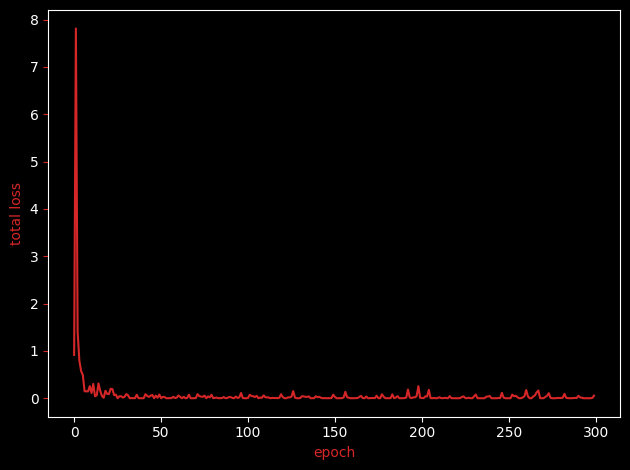

In [ ]:
fig, ax1 = plt.subplots()
color = "tab:red"
ax1.plot(losss, color = color)
ax1.set_xlabel("epoch", color = color)
ax1.set_ylabel("total loss", color = color)
ax1.tick_params(axis='y', color = color)
print(accuracy_list[8])
#ax2 = ax1.twinx()
#color = "tab:blue"
#ax2.set_ylabel('accuracy', color = color)
#ax2.plot(accuracy_list, color = color)
#ax2.tick_params(axis='y', color = color)
fig.tight_layout()

sample4
 predicted: tensor(0)
 actual: tensor(1)
sample6
 predicted: tensor(0)
 actual: tensor(1)
sample26
 predicted: tensor(0)
 actual: tensor(1)
sample32
 predicted: tensor(0)
 actual: tensor(1)
sample34
 predicted: tensor(0)
 actual: tensor(1)


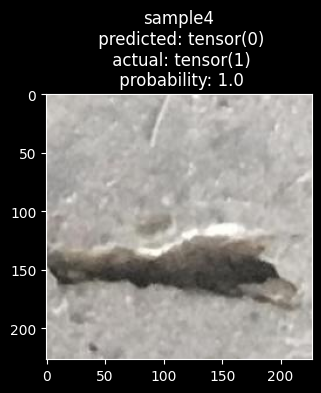

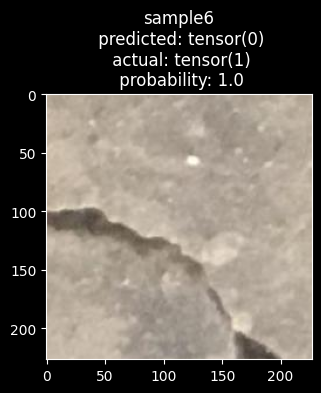

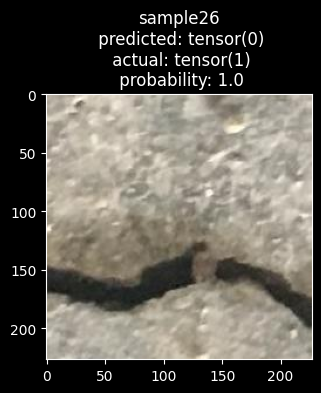

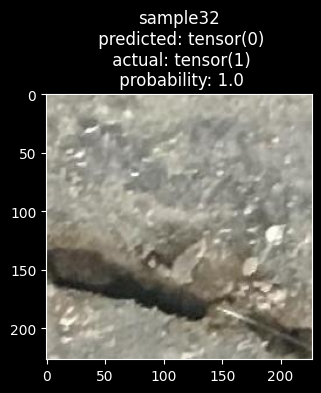

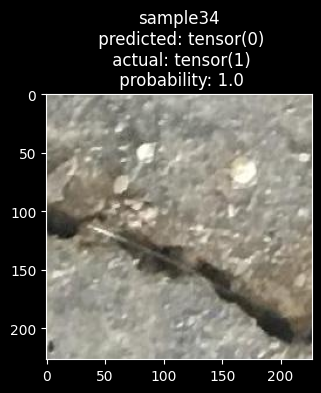

In [ ]:
countt = 0
num = 0
Softmax_fn=nn.Softmax(dim=-1)
for x, y in val_loader:
    z = model(x)
    _, yhat = torch.max(z, 1)
    for yhati, yi in zip(yhat, y):
        if not yhati == yi:
            plt.figure(figsize=(20, 20))
            plt.subplot(5, 1, countt+1)
            plt.imshow(Image.open(dataset_val.all_files[num]))
            plt.title("sample" + str(num) + "\n predicted: " + str(yhati) + "\n actual: " + str(yi) + "\n probability: " + str(torch.max(Softmax_fn(z)).item()))
            print("sample" + str(num) + "\n predicted: " + str(yhati) + "\n actual: " + str(yi))
            countt += 1
        if countt >= 5:
            break
        num+=1
    if countt >= 5:
        break